# ECE 143 Data Visualizations

## Evaluation of Predictors

### All Music

In [1]:
import EDA
import ErrorAnalysis as EA
import linear_regression as LR
import polynomial_regression as PR
import random_forest as RF
import pandas as pd

all_data = EDA.load_cleaned_data()

### Evaluation Routine

In [12]:
def evaluate_cluster(data : pd.DataFrame, cluster : str, group_name : str):
    if cluster is not None:
        df = EDA.get_genre_subset(data, cluster)
    else:
        df = data
    print(f'Cluster: {group_name}')
    pearson, spearman = EDA.report_correlation(df, 'popularity')

    for correlation_name, correlation in [("Pearson", pearson), ("Spearman", spearman)]:
        print(f'Evaluating with {correlation_name} correlation')
        
        top_10_features = EDA.plot_top_ten_features(correlation, f'{correlation_name} Popularity')

        # Run linear regression
        model, y_test, y_pred = LR.run_linear_regression(df, top_10_features, 'popularity')
        EA.generate_slide_graphics(y_test, y_pred, f"Linear Regression with {correlation_name} Correlation")

        # Run polynomial regression
        model, y_test, y_pred, order = PR.find_optimal_poly_regression(df, top_10_features, 'popularity')
        EA.generate_slide_graphics(y_test, y_pred, f"Order {order} Polynomial Regression with {correlation_name} Correlation")

        # Run random forest
        model, y_test, y_pred = RF.run_random_forest(df, top_10_features, 'popularity')
        EA.generate_slide_graphics(y_test, y_pred, f"Random Forest with {correlation_name} Correlation")

        # Run xgboost regression



### All Genres

Cluster: All Songs
Evaluating with Pearson correlation
Top 10 Features for Pearson Popularity Correlation:
entropy_energy       0.275831
danceability         0.215479
MFCC_1               0.207961
loudness             0.205950
MEL_2                0.195601
MFCC_6               0.194563
duration_ms          0.171191
MEL_3                0.169636
spectral_bandwith    0.163436
MEL_1                0.161444
dtype: float64


/home/irnehs/UCSD/wi25/ece143/ece143_project/EDA.py:145: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(y=top_10_features, x=correlation[:10], palette=pastel_colors)


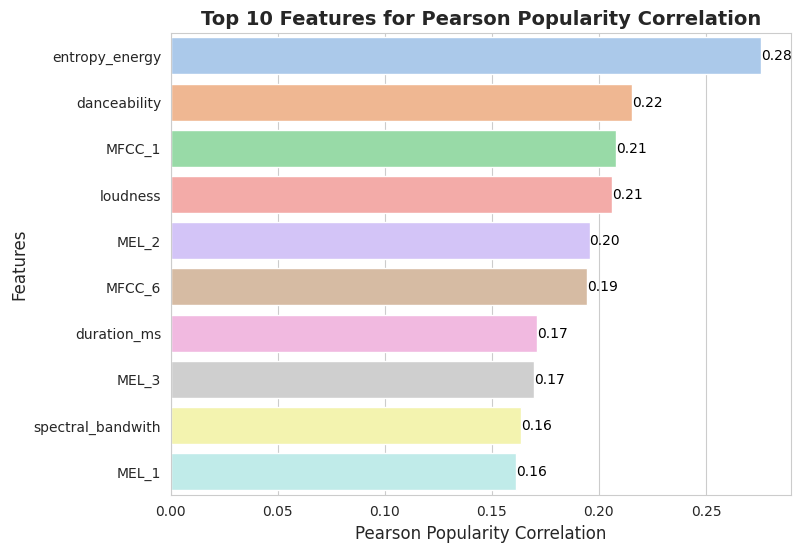

       RMSE:      R2:
0  14.765516  0.10555


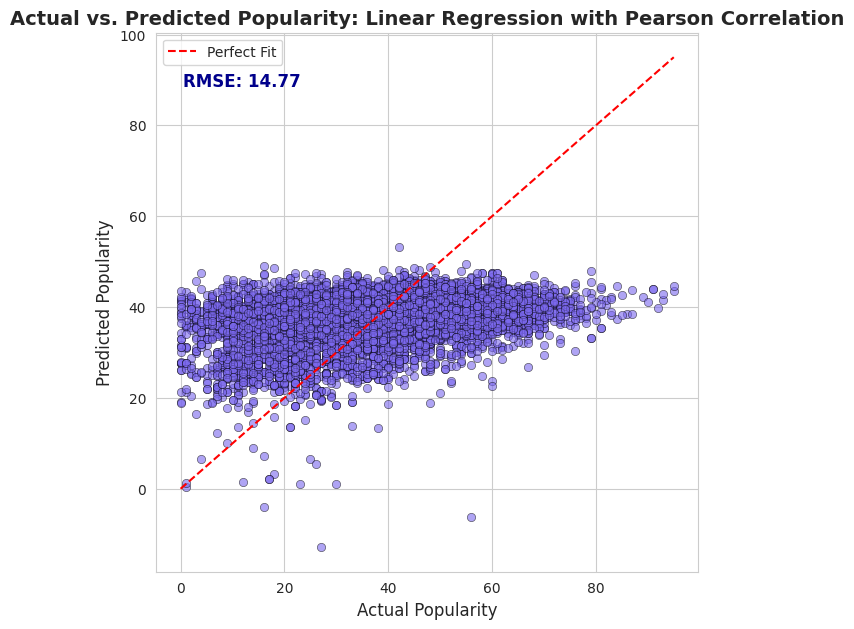

       RMSE:       R2:
0  14.539753  0.132693


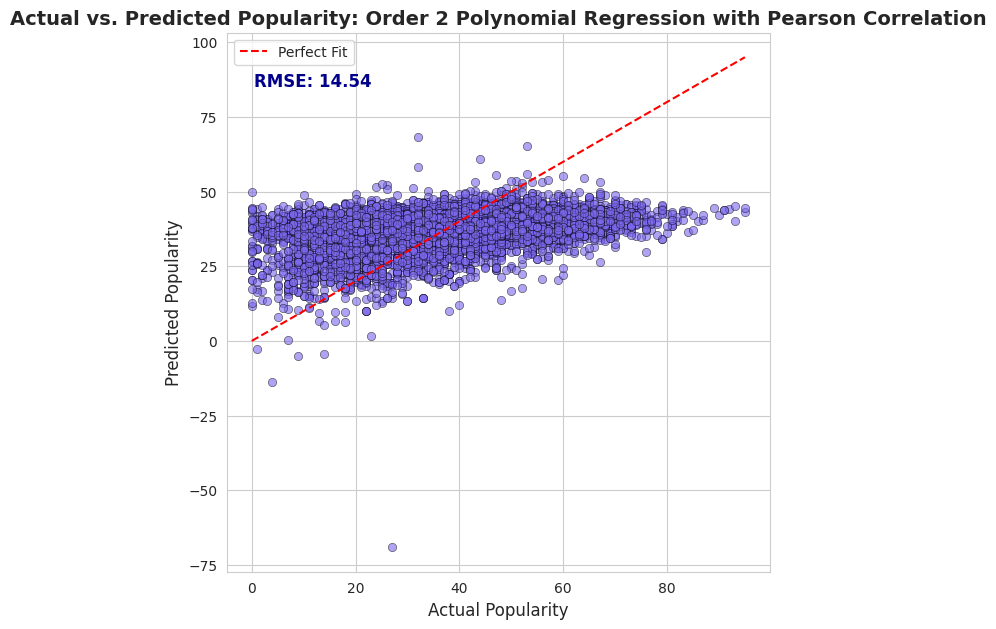

      RMSE:       R2:
0  12.29902  0.379417


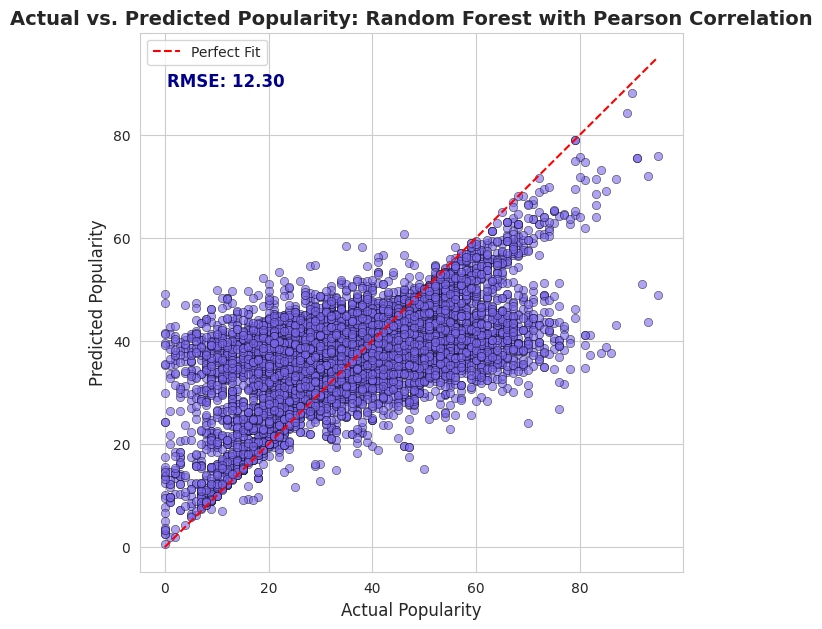

Evaluating with Spearman correlation
Top 10 Features for Spearman Popularity Correlation:
entropy_energy    0.262842
MEL_127           0.260529
MEL_126           0.260395
MEL_128           0.260376
MEL_125           0.260242
MEL_123           0.259994
MEL_124           0.259798
MEL_122           0.259612
MEL_120           0.259334
MEL_121           0.259233
dtype: float64


/home/irnehs/UCSD/wi25/ece143/ece143_project/EDA.py:145: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(y=top_10_features, x=correlation[:10], palette=pastel_colors)


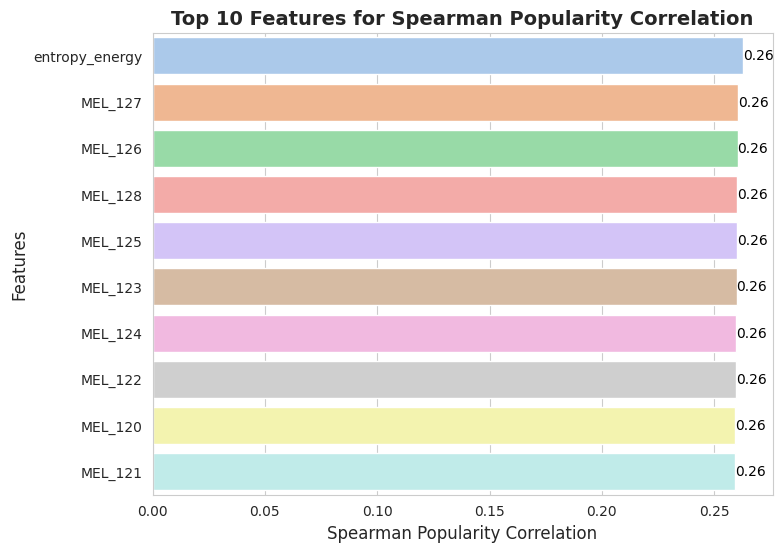

       RMSE:      R2:
0  14.998017  0.07716


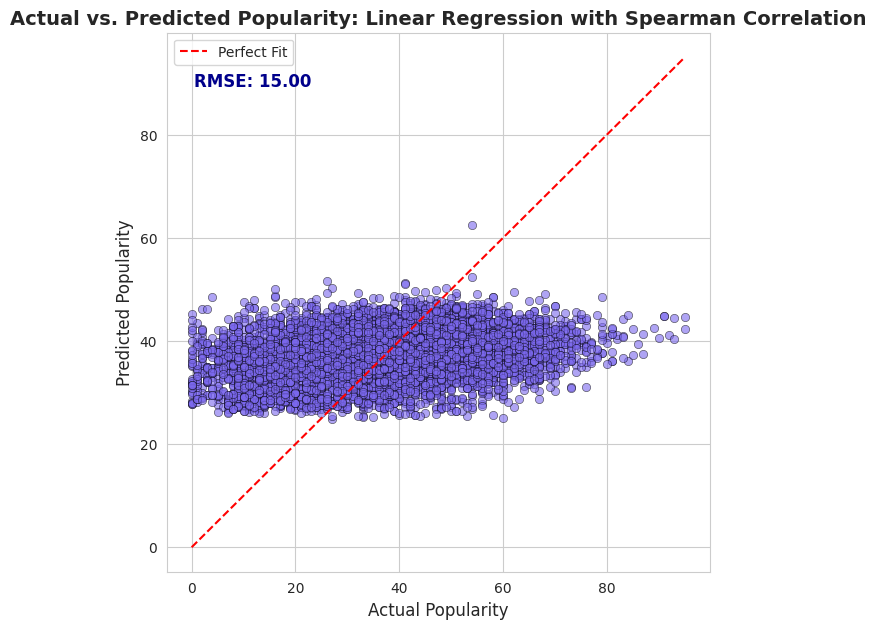

       RMSE:       R2:
0  14.945841  0.083569


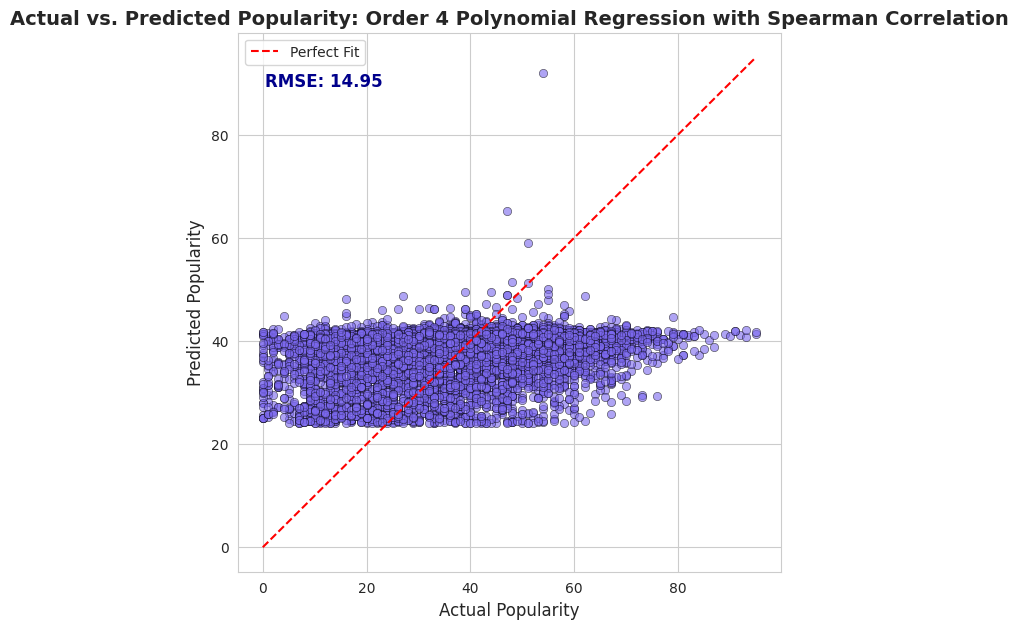

      RMSE:       R2:
0  13.22741  0.282192


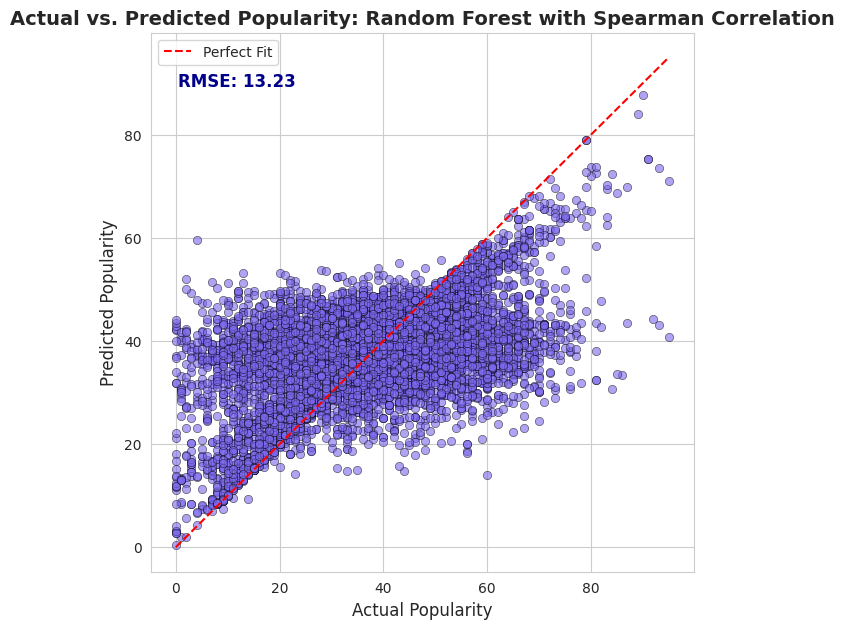

In [13]:
evaluate_cluster(all_data, None, 'All Songs')

### Pop Music

Cluster: Pop Songs
Evaluating with Pearson correlation
Top 10 Features for Pearson Popularity Correlation:
entropy_energy       0.174422
MEL_2                0.152603
MEL_1                0.148709
MEL_105              0.148003
MFCC_2               0.147227
MEL_106              0.146655
MEL_108              0.145457
loudness             0.145392
MEL_101              0.145138
spectral_bandwith    0.144590
dtype: float64


/home/irnehs/UCSD/wi25/ece143/ece143_project/EDA.py:145: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(y=top_10_features, x=correlation[:10], palette=pastel_colors)


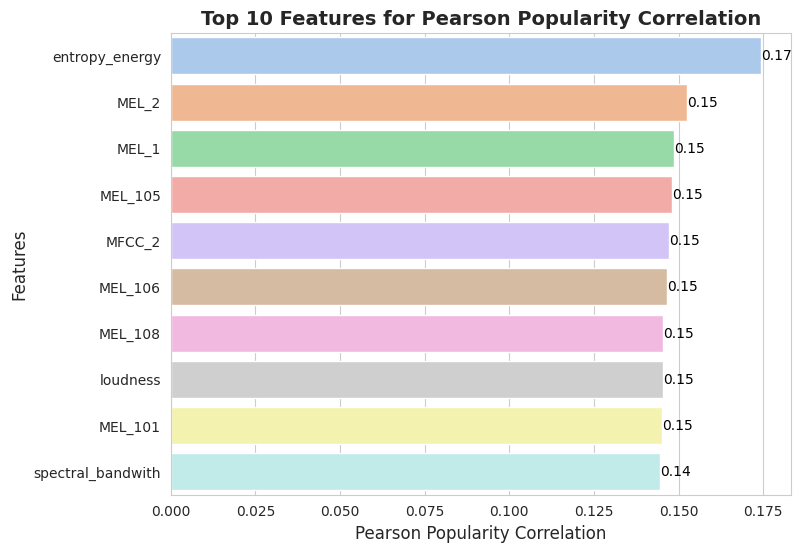

       RMSE:       R2:
0  14.368522  0.094453


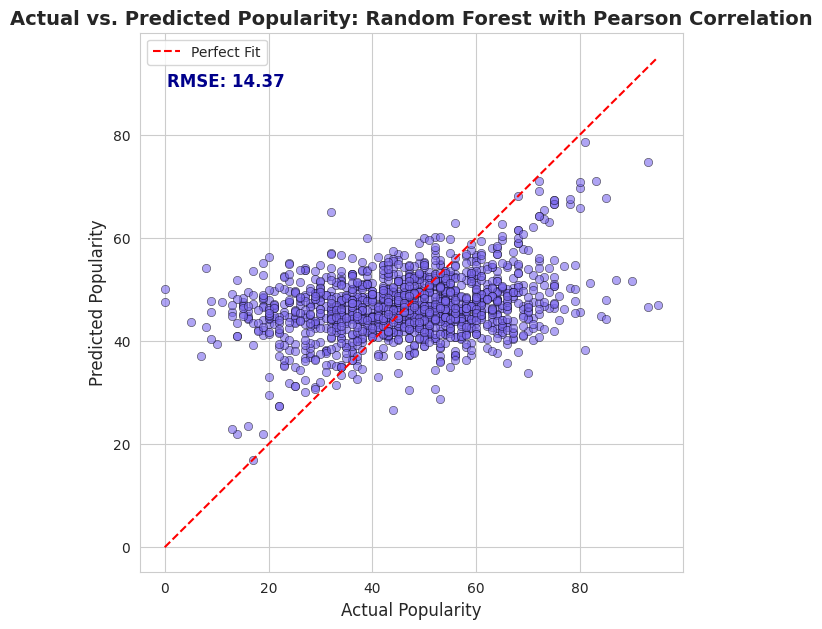

      RMSE:       R2:
0  14.89236  0.027222


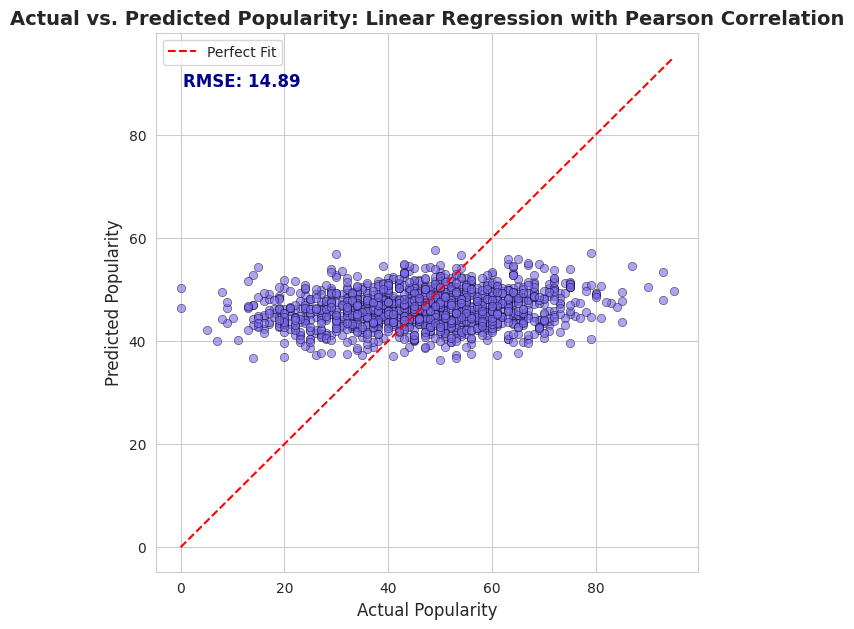

       RMSE:       R2:
0  14.979758  0.015771


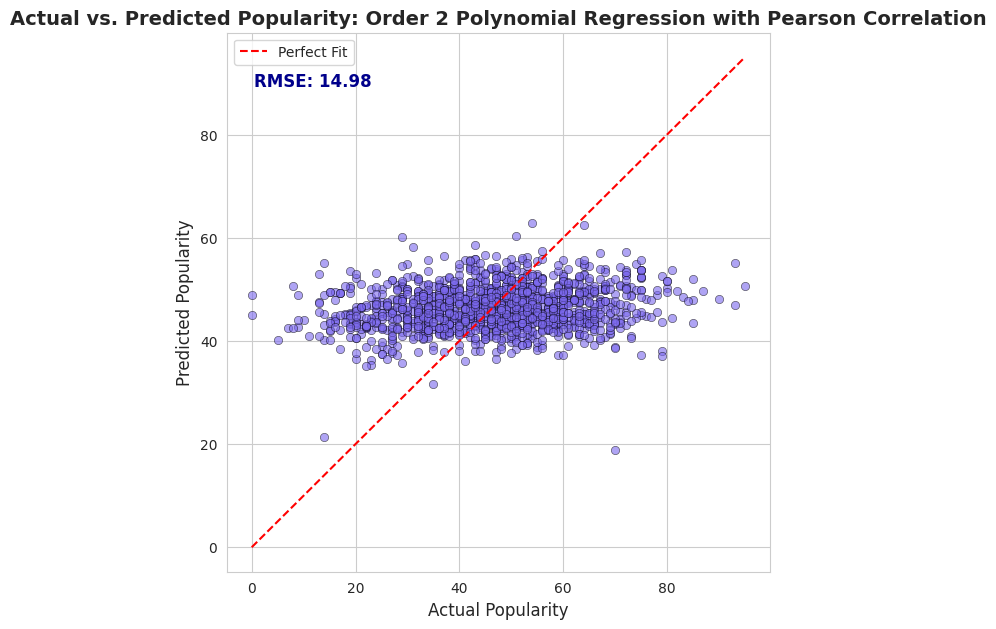

Evaluating with Spearman correlation
Top 10 Features for Spearman Popularity Correlation:
MEL_128    0.203696
MEL_125    0.203378
MEL_126    0.203353
MEL_127    0.203256
MEL_123    0.203097
MEL_124    0.202566
MEL_122    0.202538
MEL_121    0.201846
MEL_120    0.201824
MEL_119    0.201142
dtype: float64


/home/irnehs/UCSD/wi25/ece143/ece143_project/EDA.py:145: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(y=top_10_features, x=correlation[:10], palette=pastel_colors)


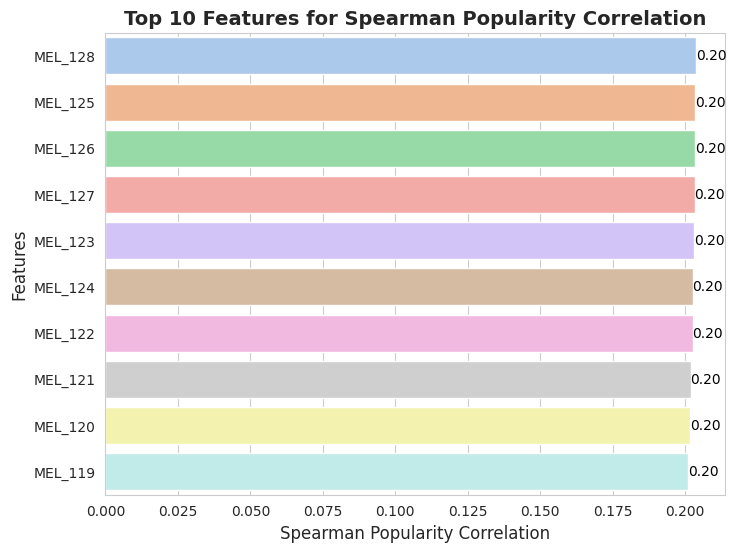

       RMSE:       R2:
0  14.970153  0.017033


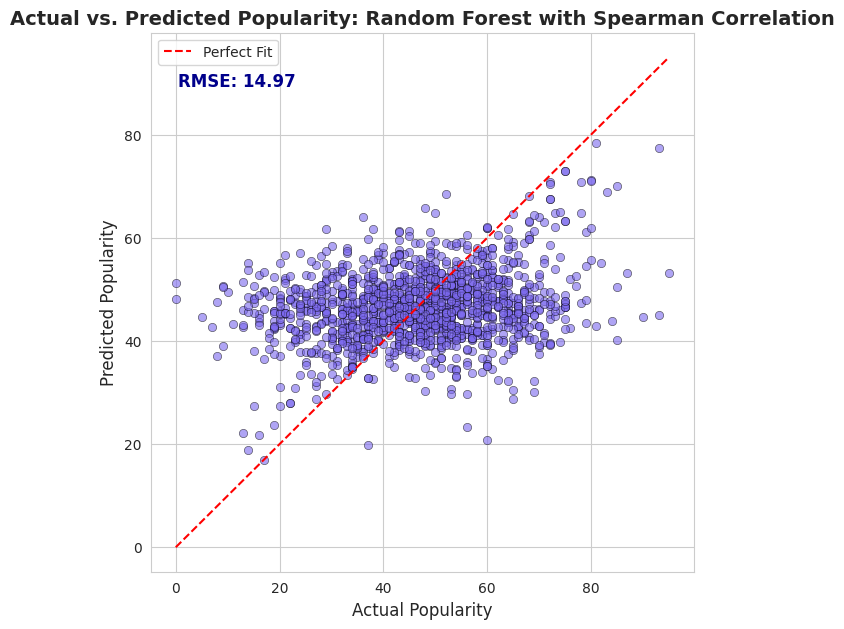

       RMSE:       R2:
0  15.242806 -0.019099


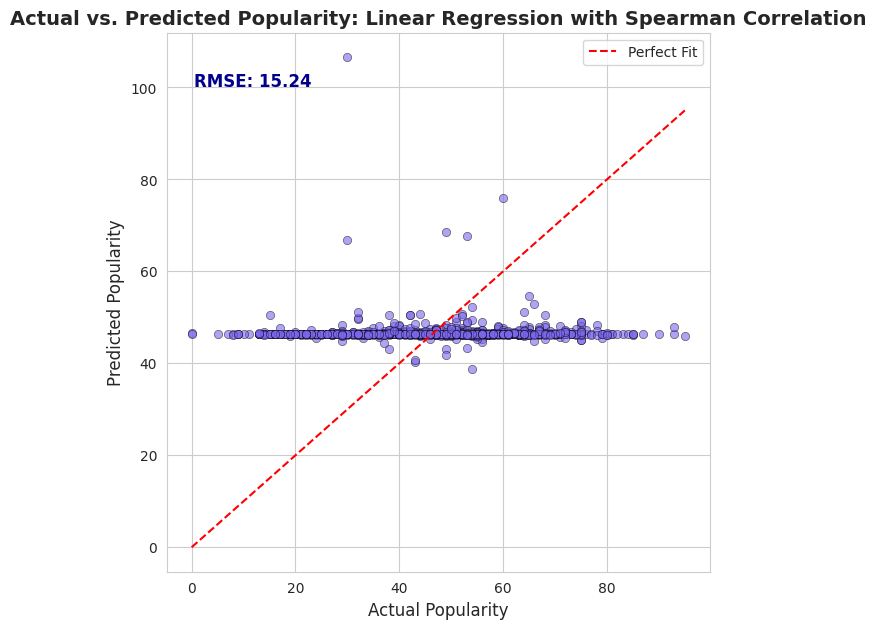

       RMSE:        R2:
0  52.363579 -11.026666


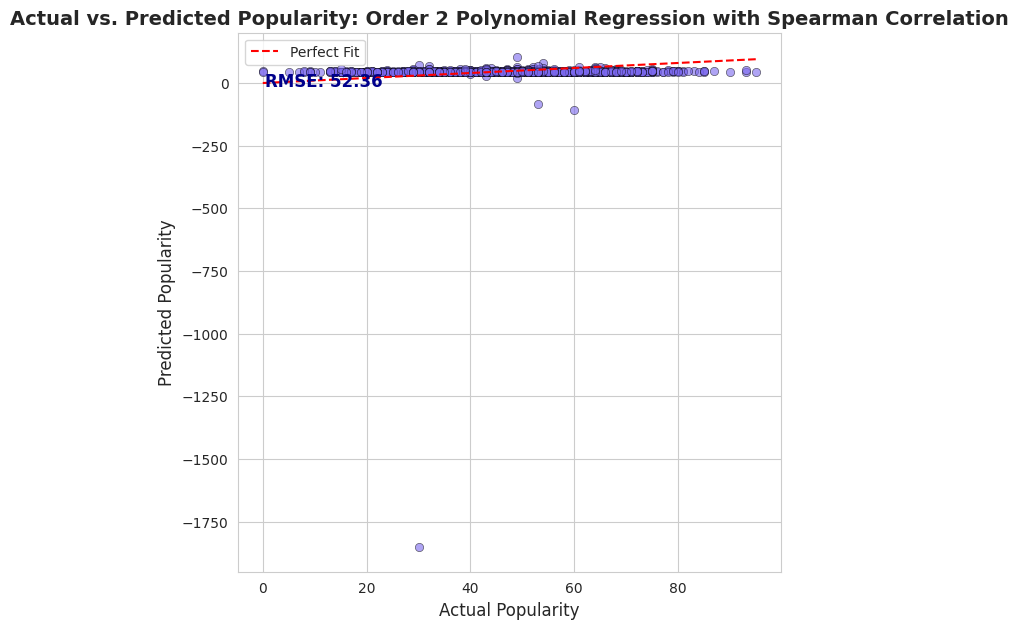

In [3]:
evaluate_cluster(all_data, 'pop', 'Pop Songs')

### Hip Hop Music

Cluster: Pop Songs
Evaluating with Pearson correlation
Top 10 Features for Pearson Popularity Correlation:
loudness          0.166181
n_sentences       0.157439
entropy_energy    0.154889
MEL_2             0.144567
MEL_44            0.138467
MEL_1             0.138243
MEL_45            0.137200
MEL_40            0.133394
MEL_46            0.131328
MEL_39            0.129718
dtype: float64


/home/irnehs/UCSD/wi25/ece143/ece143_project/EDA.py:145: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(y=top_10_features, x=correlation[:10], palette=pastel_colors)


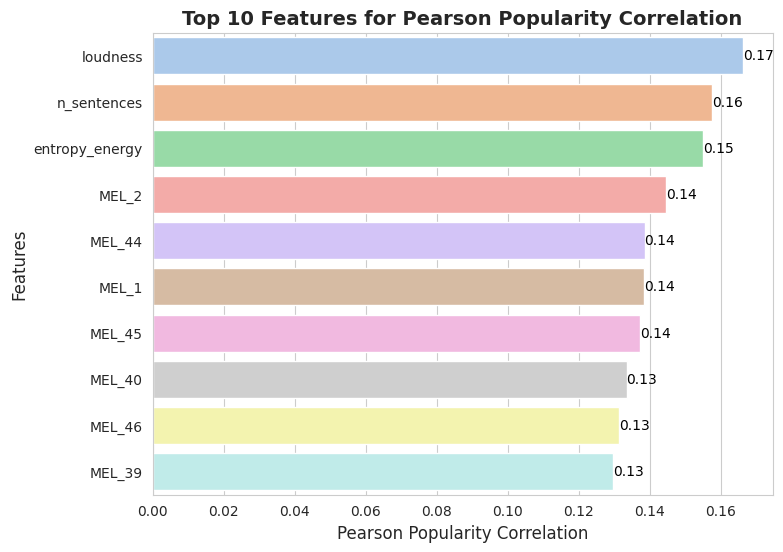

       RMSE:       R2:
0  13.615722  0.190267


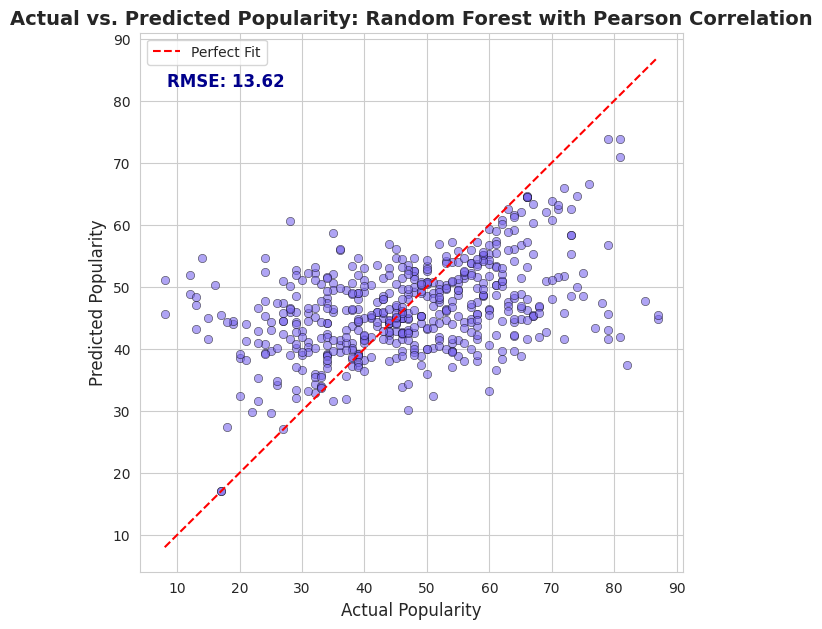

       RMSE:       R2:
0  14.385054  0.096177


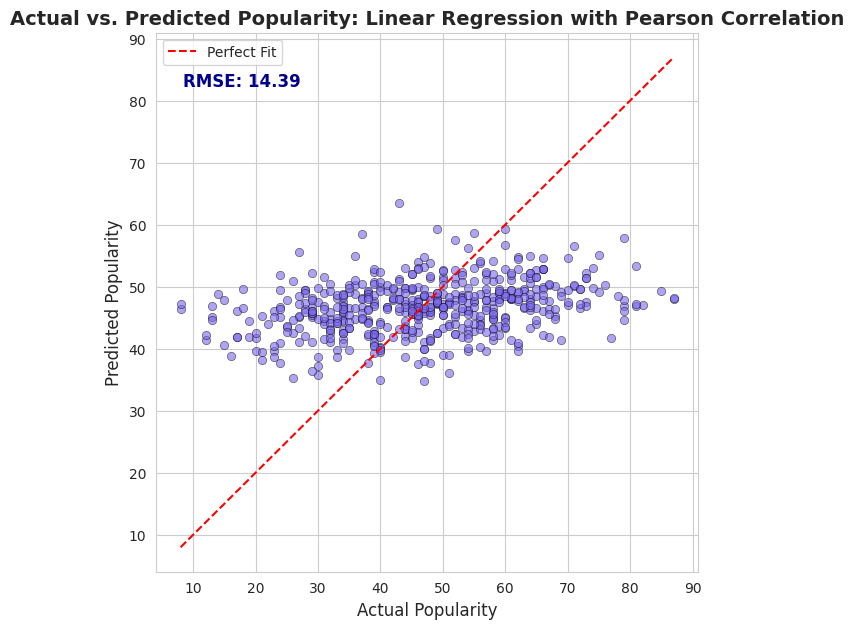

       RMSE:       R2:
0  14.438104  0.089498


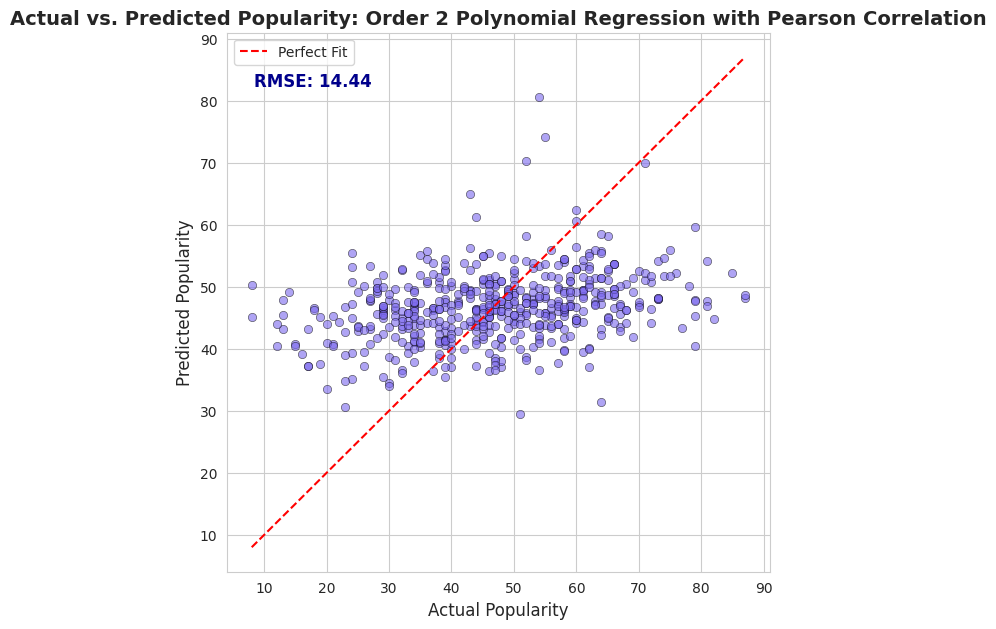

Evaluating with Spearman correlation
Top 10 Features for Spearman Popularity Correlation:
MEL_120    0.250229
MEL_119    0.249608
MEL_121    0.248705
MEL_122    0.248428
MEL_123    0.247718
MEL_127    0.247638
MEL_126    0.247174
MEL_125    0.246615
MEL_128    0.246367
MEL_124    0.246155
dtype: float64


/home/irnehs/UCSD/wi25/ece143/ece143_project/EDA.py:145: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(y=top_10_features, x=correlation[:10], palette=pastel_colors)


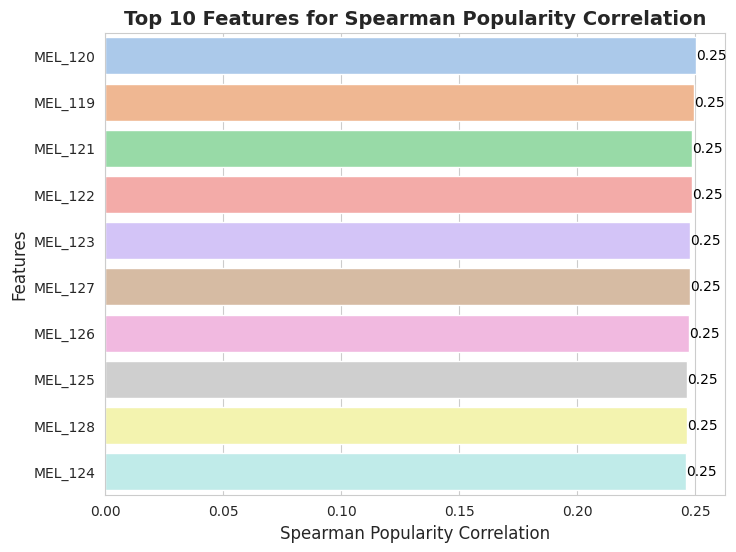

       RMSE:       R2:
0  13.666039  0.184271


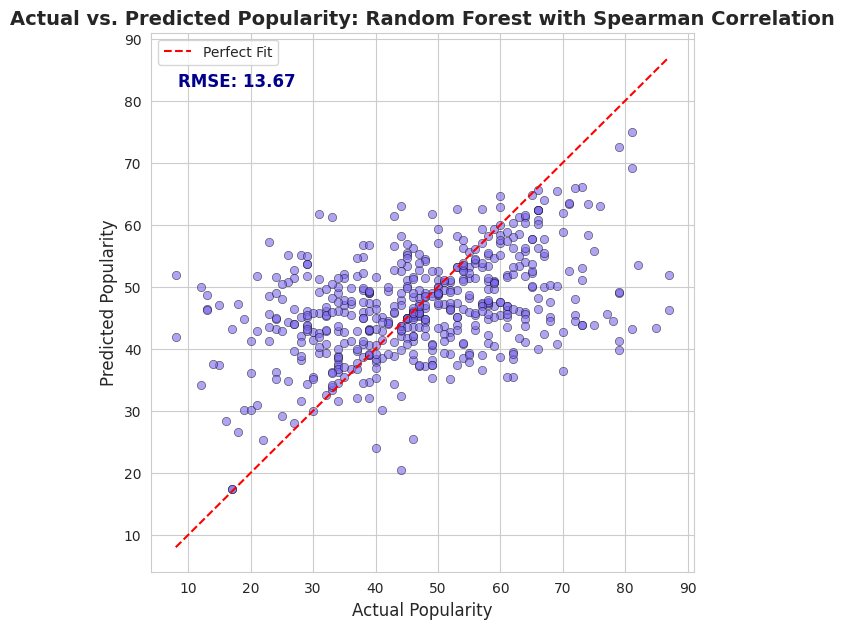

      RMSE:       R2:
0  15.18102 -0.006613


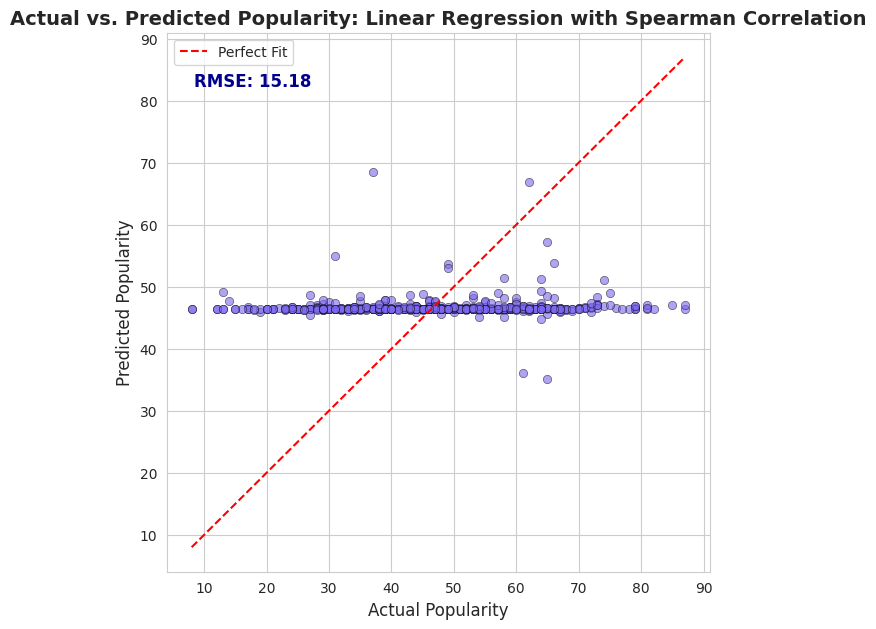

       RMSE:       R2:
0  18.589073 -0.509302


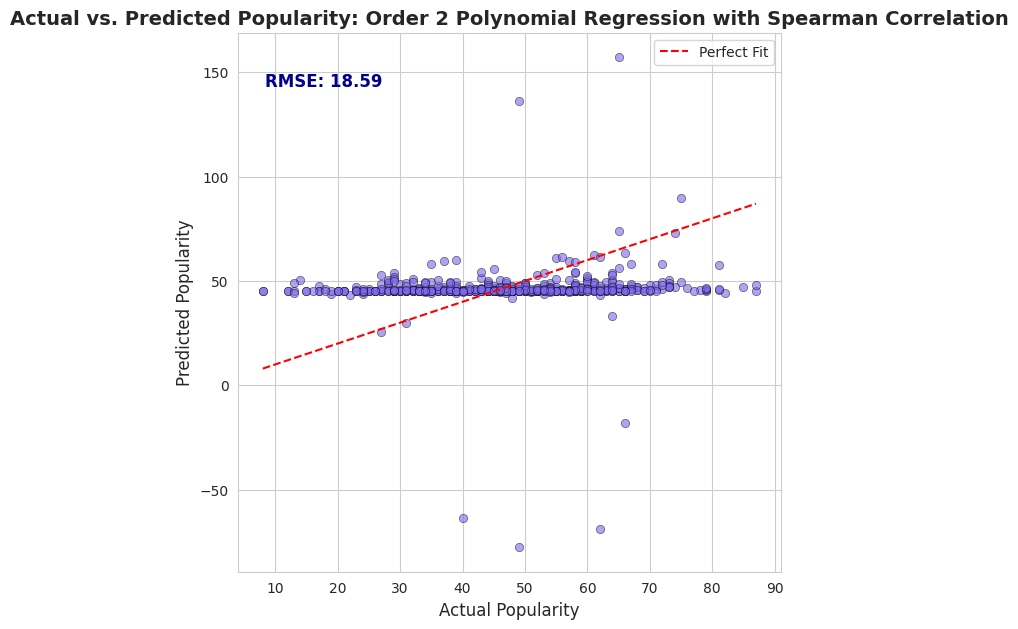

In [ ]:
evaluate_cluster(all_data, 'hip hop', 'Hip Hop Songs')

### Rock Music

Cluster: Pop Songs
Evaluating with Pearson correlation
Top 10 Features for Pearson Popularity Correlation:
instrumentalness       0.133592
danceability           0.123408
sentence_similarity    0.112992
norm_anticipation      0.095607
MEL_108                0.093674
entropy_energy         0.091793
Spectral_contrast_3    0.090448
vocabulary_wealth      0.087852
Spectral_contrast_4    0.087622
norm_trust             0.084560
dtype: float64


/home/irnehs/UCSD/wi25/ece143/ece143_project/EDA.py:145: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(y=top_10_features, x=correlation[:10], palette=pastel_colors)


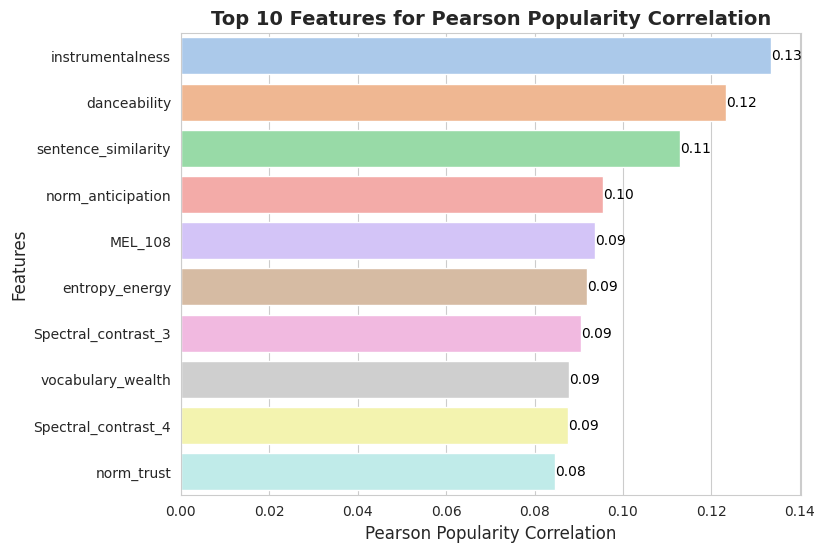

       RMSE:       R2:
0  14.682512  0.072647


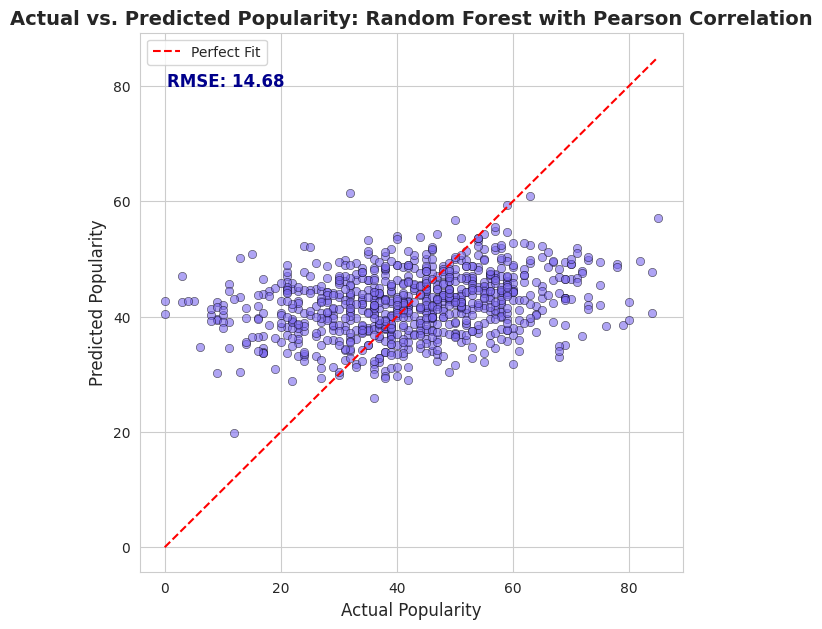

       RMSE:       R2:
0  15.005286  0.031426


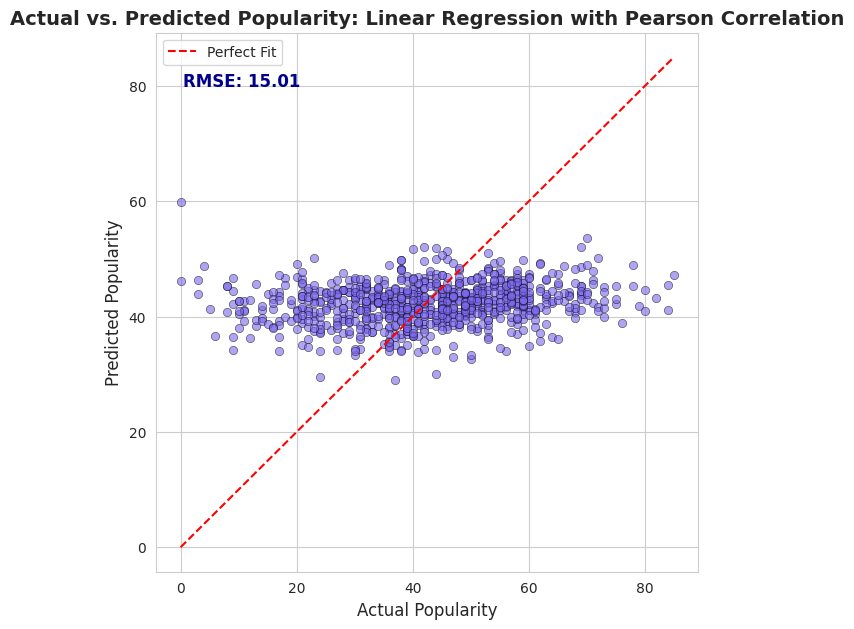

       RMSE:      R2:
0  14.941135  0.03969


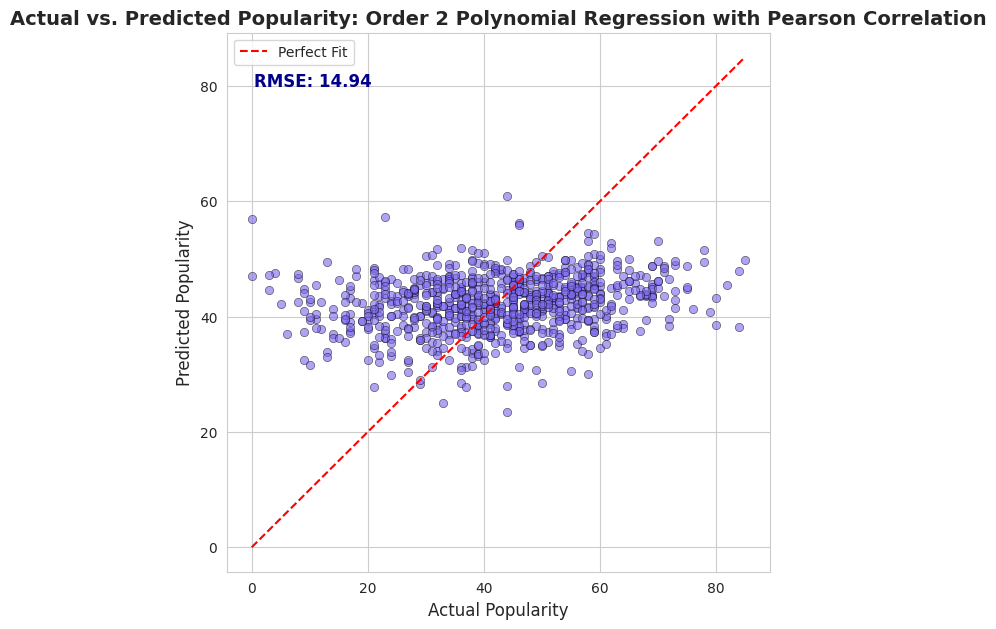

Evaluating with Spearman correlation
Top 10 Features for Spearman Popularity Correlation:
n_words             0.203835
n_sentences         0.192235
instrumentalness    0.186309
anticipation        0.159614
trust               0.156066
joy                 0.154489
positive            0.154025
sadness             0.142764
negative            0.141229
fear                0.138503
dtype: float64


/home/irnehs/UCSD/wi25/ece143/ece143_project/EDA.py:145: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(y=top_10_features, x=correlation[:10], palette=pastel_colors)


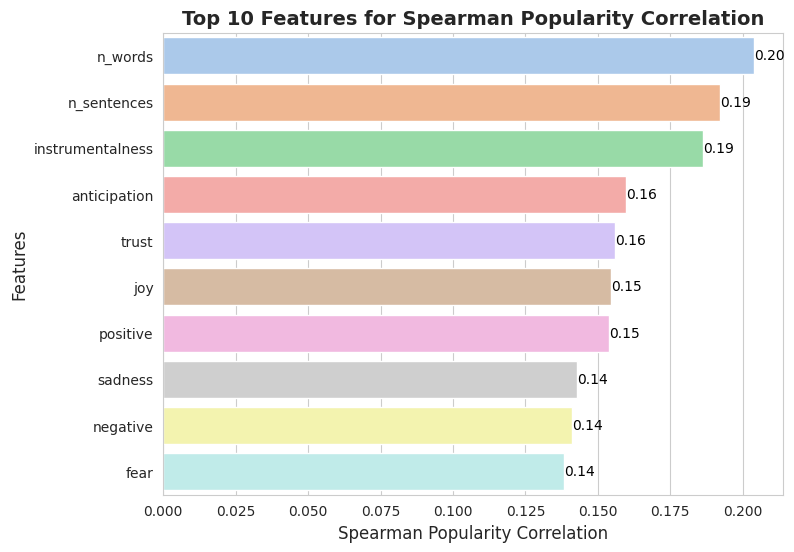

       RMSE:       R2:
0  14.533515  0.091373


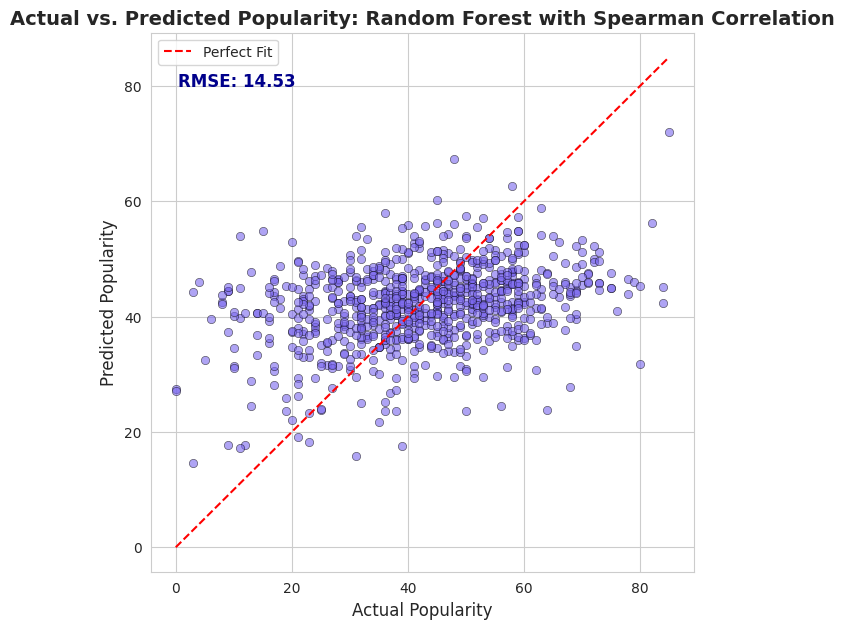

       RMSE:       R2:
0  15.884635 -0.085423


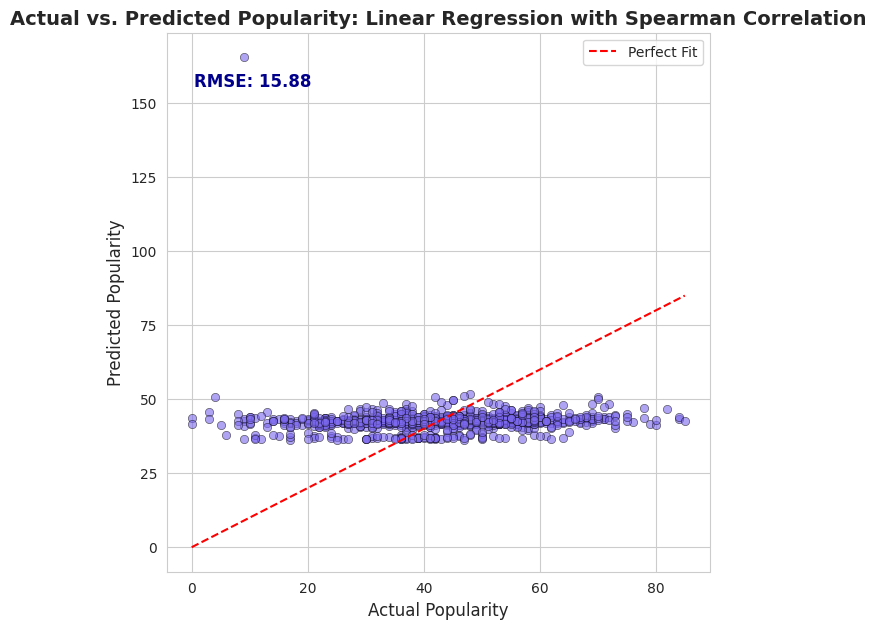

        RMSE:        R2:
0  128.916781 -70.492961


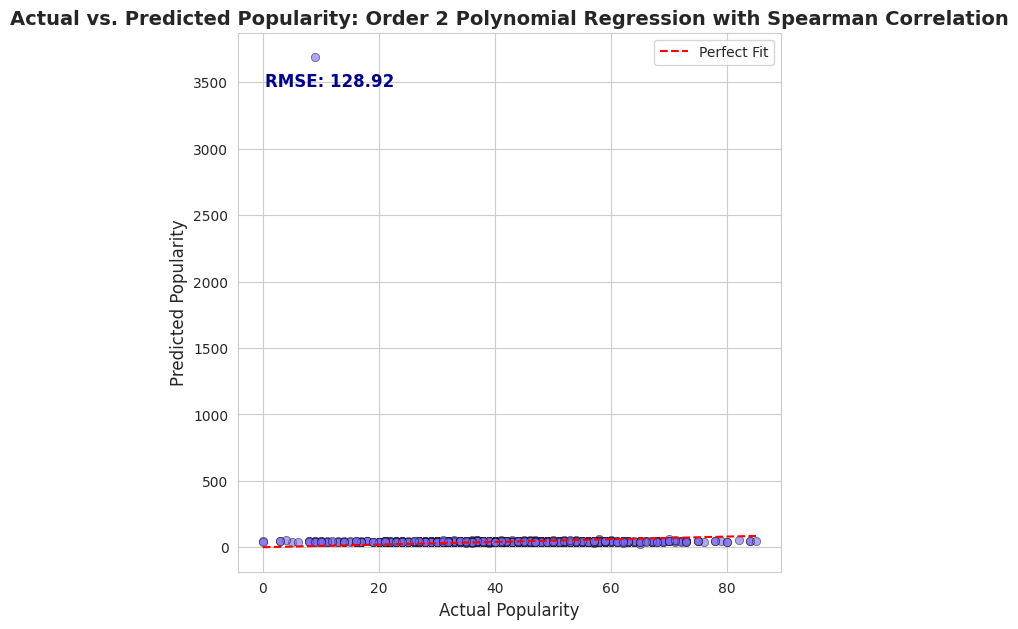

In [ ]:
evaluate_cluster(all_data, 'rock', 'Rock Songs')

### Country Music

Cluster: Pop Songs
Evaluating with Pearson correlation
Top 10 Features for Pearson Popularity Correlation:
positive               0.228508
n_sentences            0.197470
n_words                0.194641
MEL_86                 0.185515
Spectral_contrast_4    0.182482
MEL_88                 0.181591
MEL_84                 0.175891
MEL_87                 0.174987
MEL_85                 0.173287
MEL_73                 0.172532
dtype: float64


/home/irnehs/UCSD/wi25/ece143/ece143_project/EDA.py:145: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(y=top_10_features, x=correlation[:10], palette=pastel_colors)


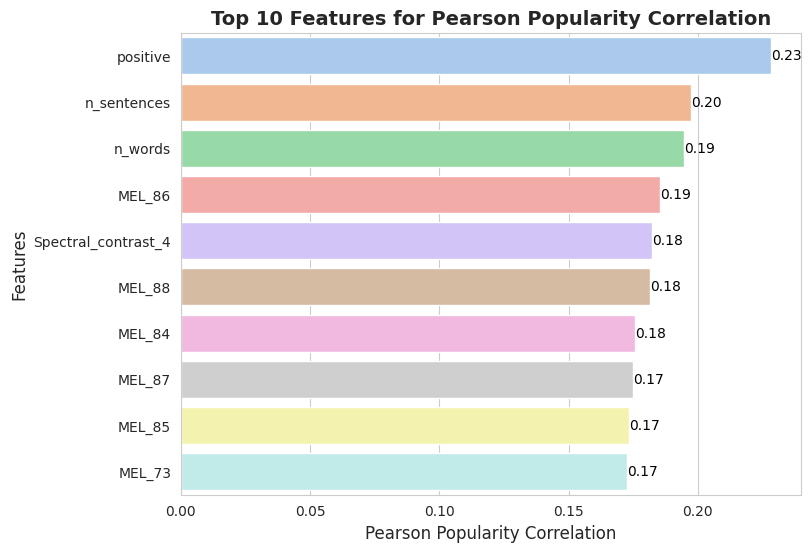

       RMSE:       R2:
0  13.988288  0.188089


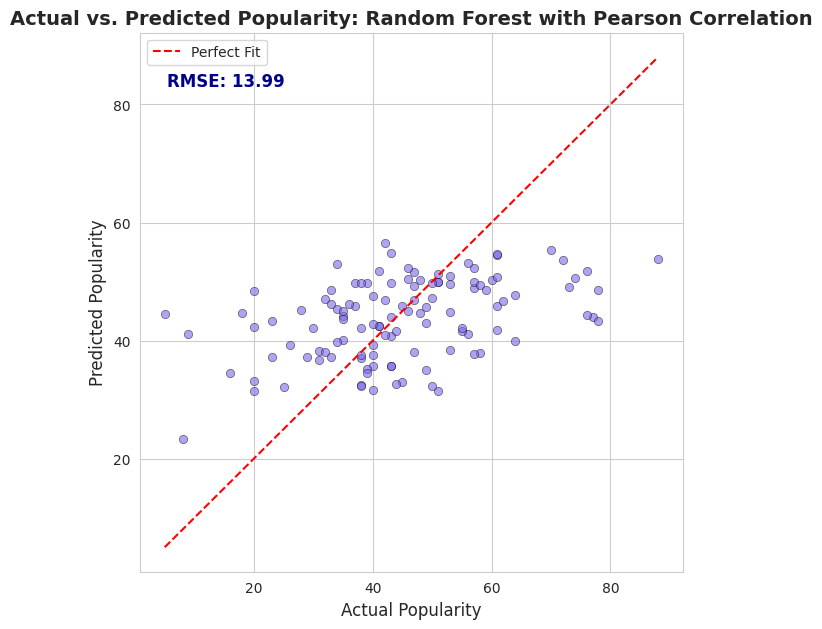

       RMSE:      R2:
0  14.976181  0.06936


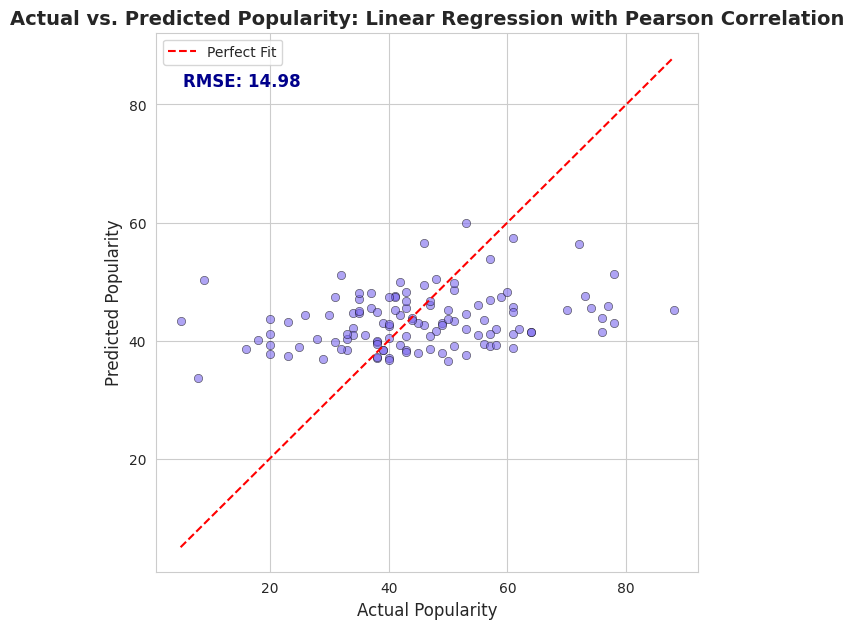

       RMSE:       R2:
0  18.603875 -0.436105


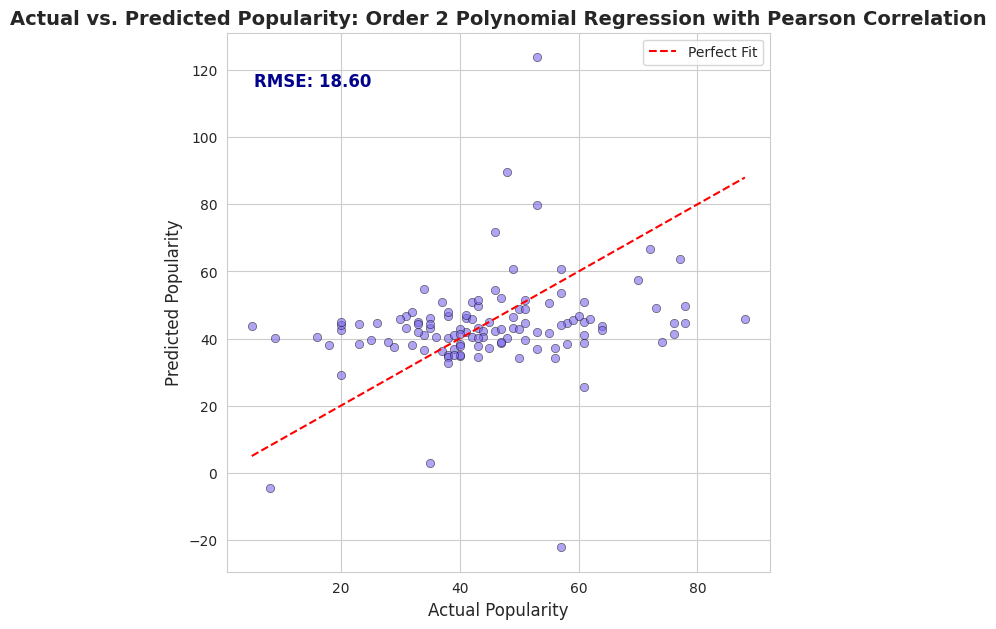

Evaluating with Spearman correlation
Top 10 Features for Spearman Popularity Correlation:
n_words        0.255066
positive       0.229733
n_sentences    0.225435
MEL_88         0.193615
MEL_86         0.193033
MEL_87         0.182722
MEL_85         0.181764
MEL_84         0.179792
MFCC_13        0.178947
MEL_83         0.177761
dtype: float64


/home/irnehs/UCSD/wi25/ece143/ece143_project/EDA.py:145: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(y=top_10_features, x=correlation[:10], palette=pastel_colors)


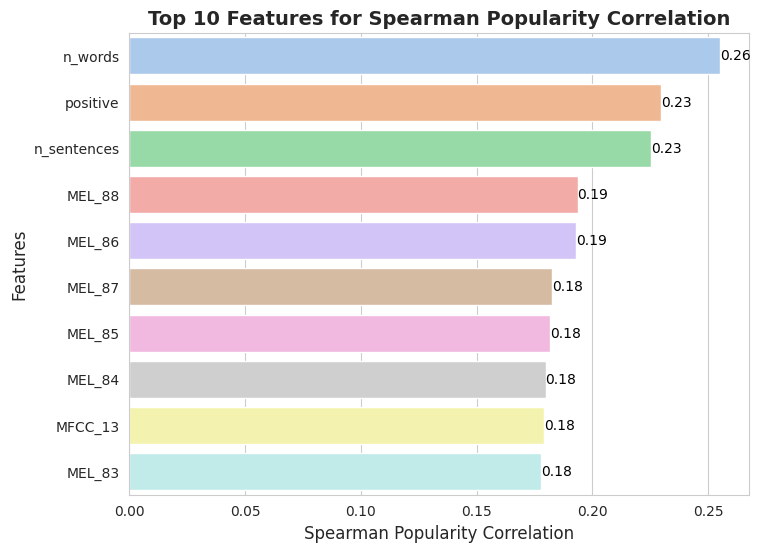

       RMSE:       R2:
0  14.034674  0.182695


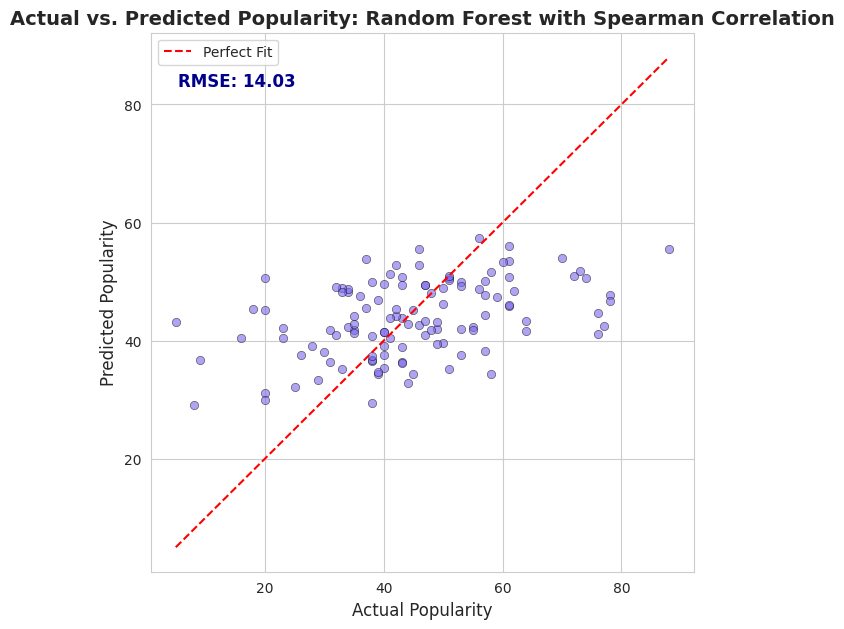

       RMSE:       R2:
0  14.907695  0.077852


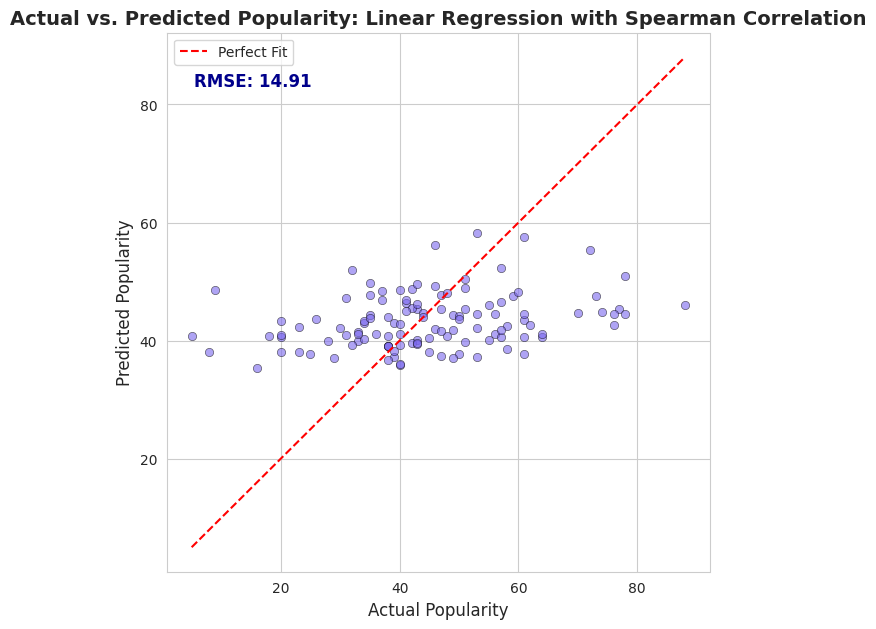

       RMSE:       R2:
0  19.922027 -0.646821


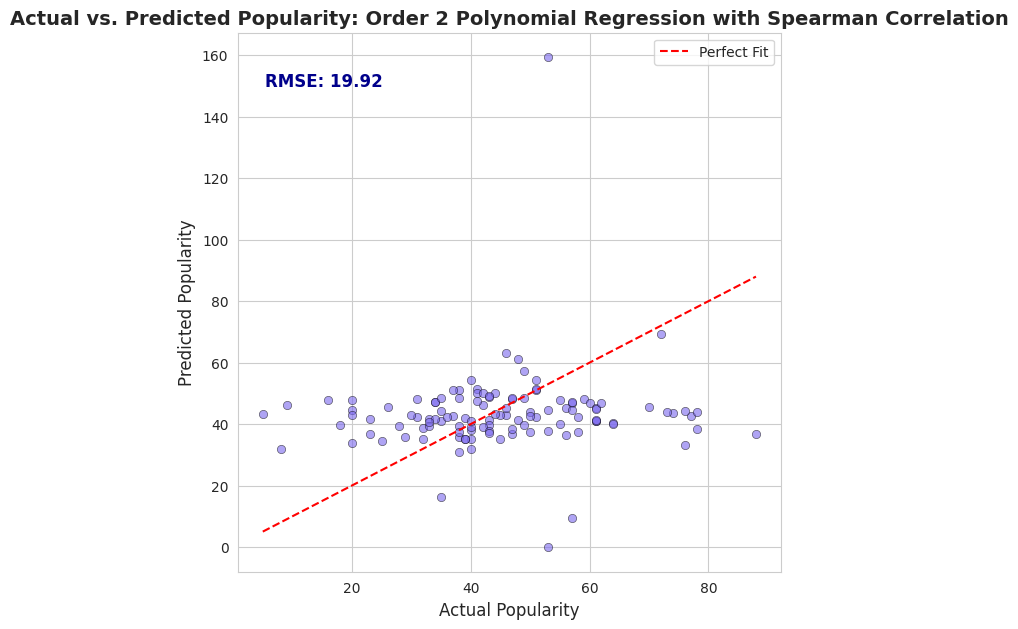

In [ ]:
evaluate_cluster(all_data, 'country', 'Country Songs')

### Folk Music

Cluster: Pop Songs
Evaluating with Pearson correlation
Top 10 Features for Pearson Popularity Correlation:
MEL_5                   0.154803
spectral_rollOff_min    0.151185
entropy_energy          0.145064
MEL_7                   0.144012
MEL_8                   0.136622
speechiness             0.136103
MEL_10                  0.135890
MEL_9                   0.134200
MFCC_6                  0.133225
MEL_6                   0.132620
dtype: float64


/home/irnehs/UCSD/wi25/ece143/ece143_project/EDA.py:145: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(y=top_10_features, x=correlation[:10], palette=pastel_colors)


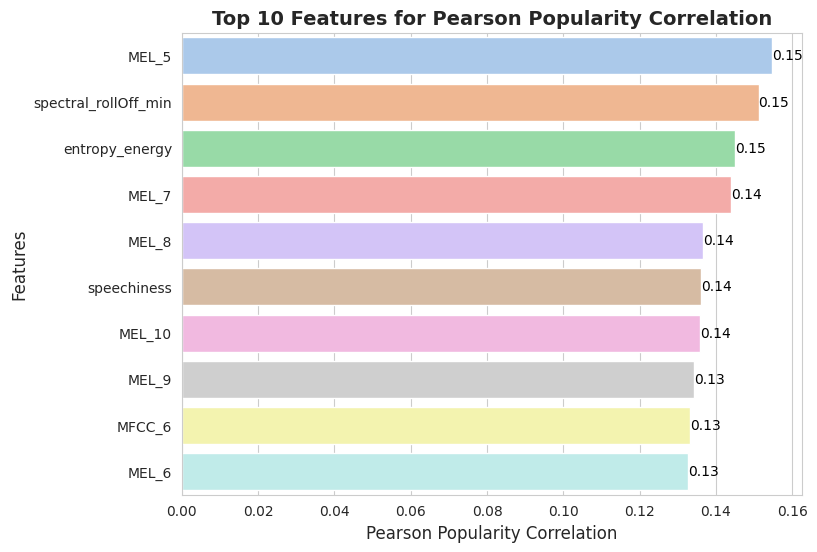

      RMSE:       R2:
0  13.91009  0.017581


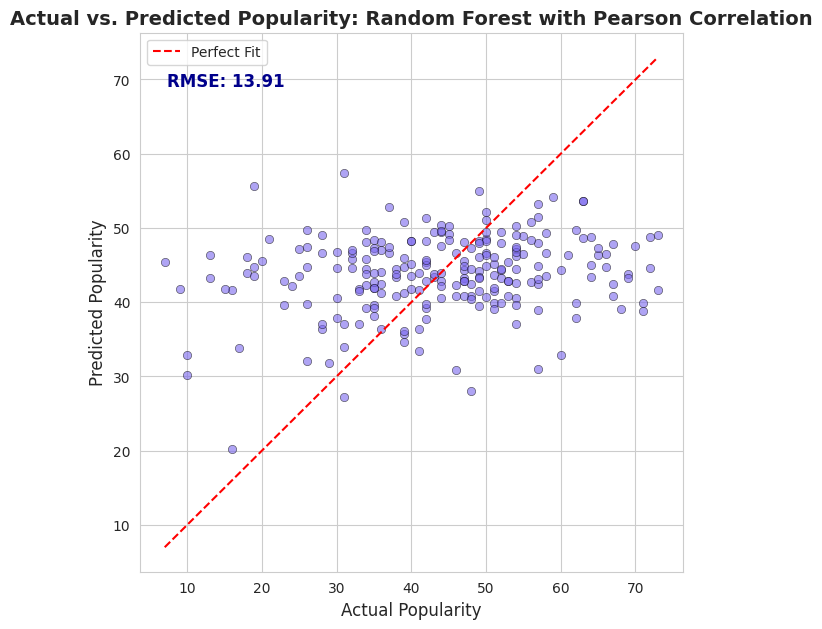

       RMSE:       R2:
0  13.653255  0.053525


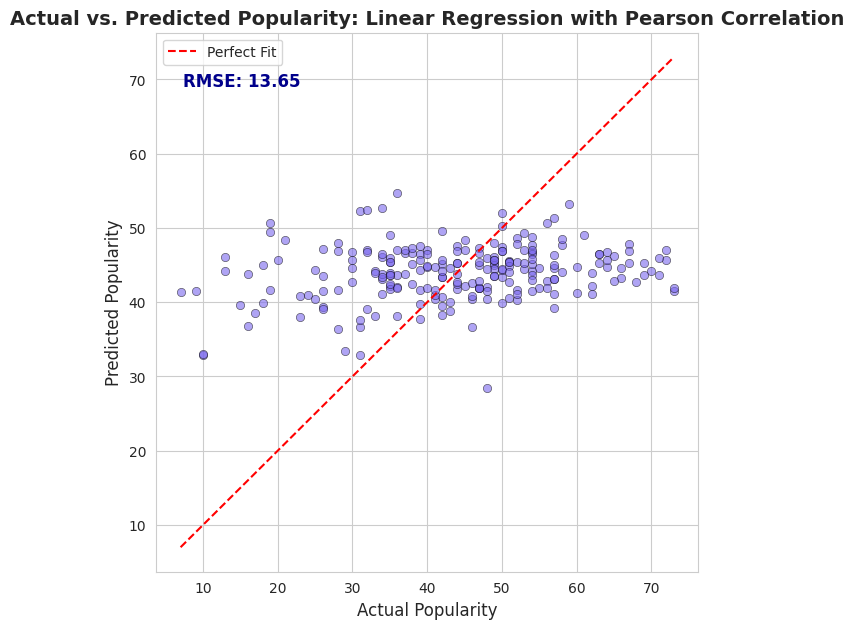

       RMSE:      R2:
0  13.811134  0.03151


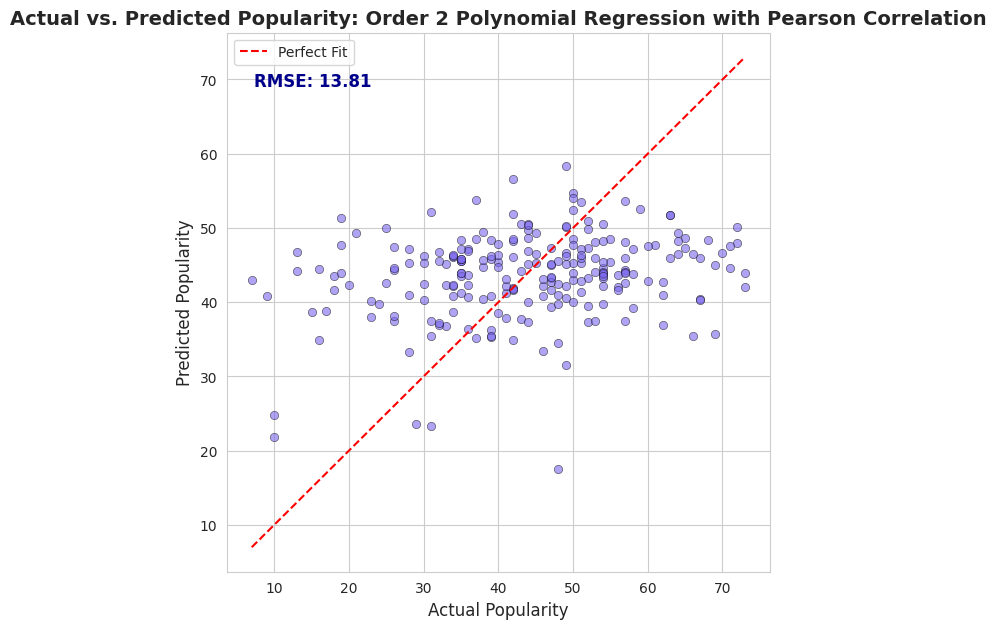

Evaluating with Spearman correlation
Top 10 Features for Spearman Popularity Correlation:
MEL_9         0.192762
MEL_5         0.183294
MEL_8         0.179952
MEL_6         0.172270
MEL_10        0.168472
MEL_7         0.166839
trust         0.161603
norm_trust    0.151871
positive      0.150822
MEL_2         0.150505
dtype: float64


/home/irnehs/UCSD/wi25/ece143/ece143_project/EDA.py:145: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(y=top_10_features, x=correlation[:10], palette=pastel_colors)


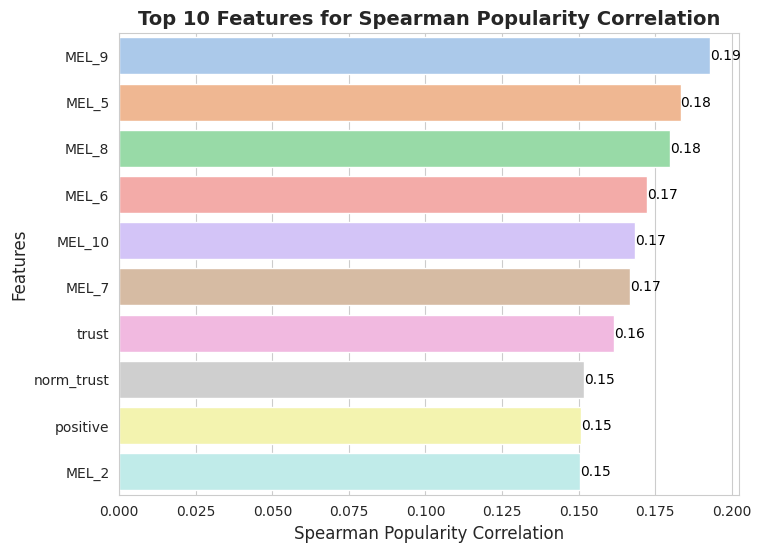

       RMSE:       R2:
0  13.428147  0.084478


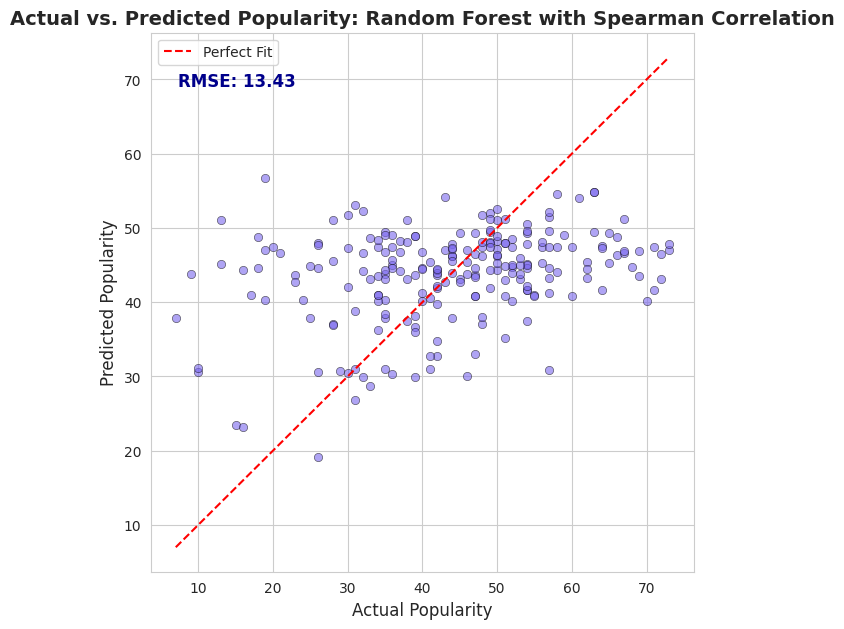

       RMSE:       R2:
0  19.656603 -0.961795


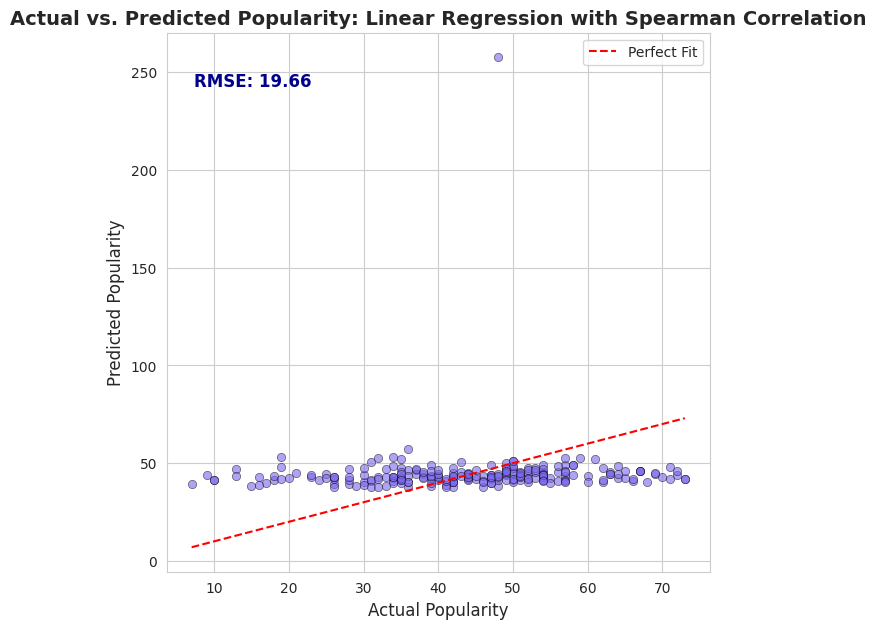

         RMSE:         R2:
0  1323.022441 -8886.32589


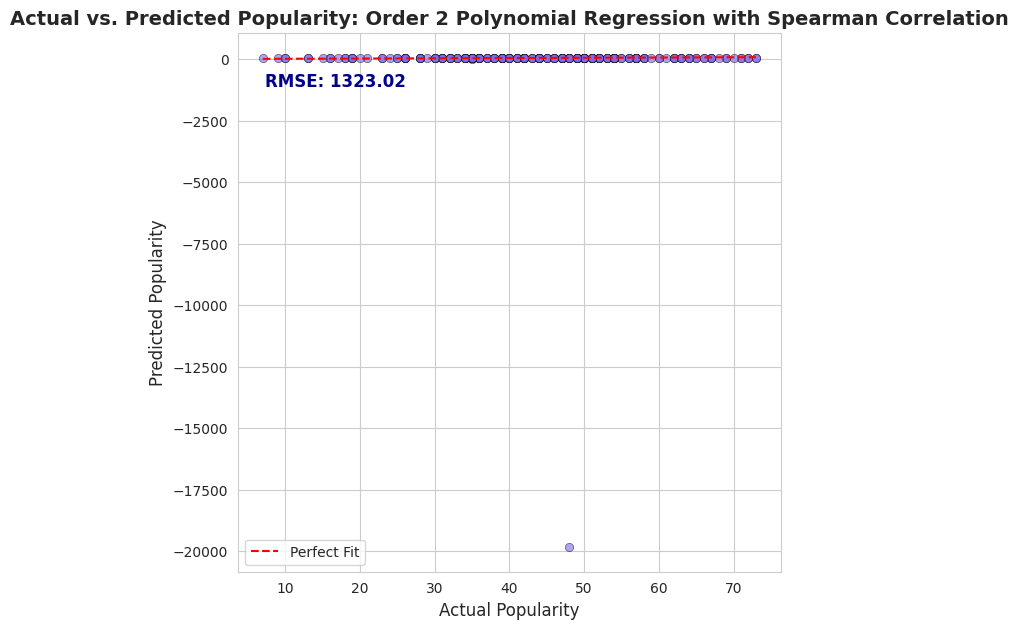

In [ ]:
evaluate_cluster(all_data, 'folk', 'Folk Songs')

### Indie Music

Cluster: Pop Songs
Evaluating with Pearson correlation
Top 10 Features for Pearson Popularity Correlation:
entropy_energy    0.181393
n_sentences       0.157908
n_words           0.155809
positive          0.150732
norm_positive     0.142470
trust             0.138216
MFCC_3            0.137318
joy               0.135035
danceability      0.133258
norm_trust        0.131681
dtype: float64


/home/irnehs/UCSD/wi25/ece143/ece143_project/EDA.py:145: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(y=top_10_features, x=correlation[:10], palette=pastel_colors)


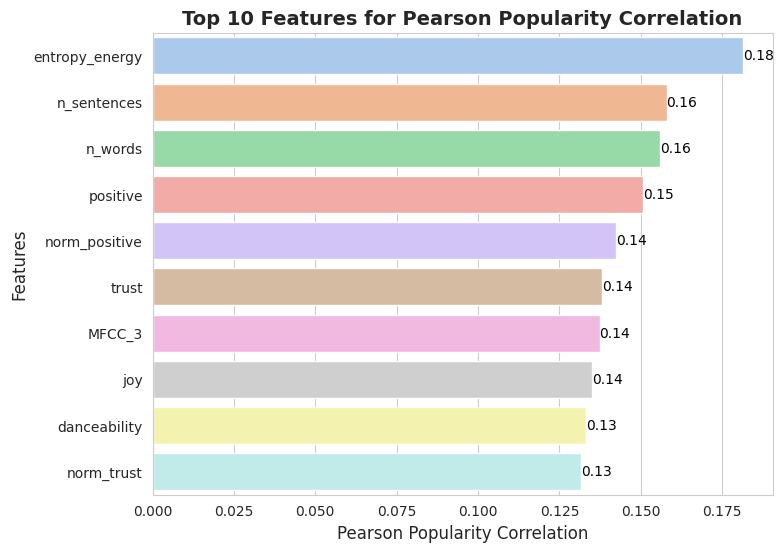

      RMSE:      R2:
0  13.68383  0.07042


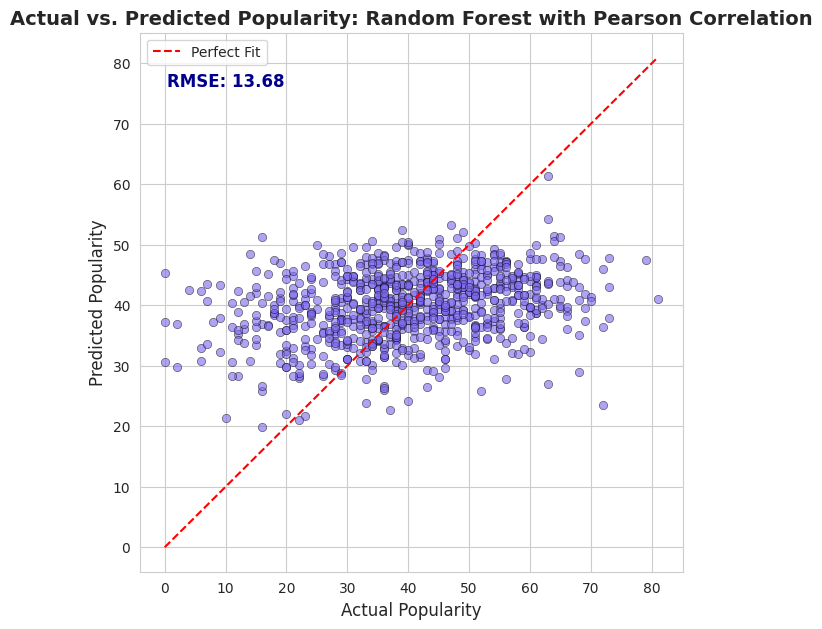

       RMSE:       R2:
0  13.630038  0.077714


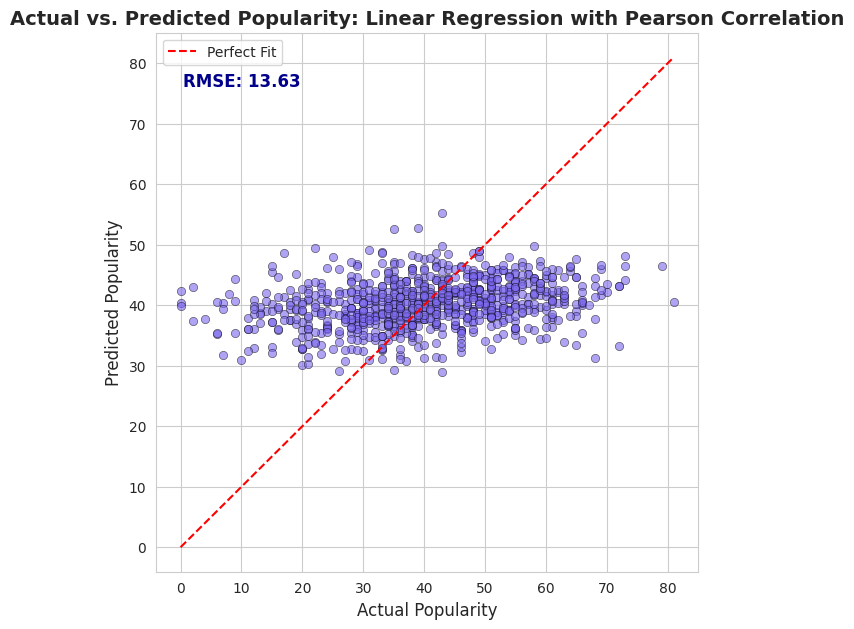

       RMSE:       R2:
0  13.694746  0.068936


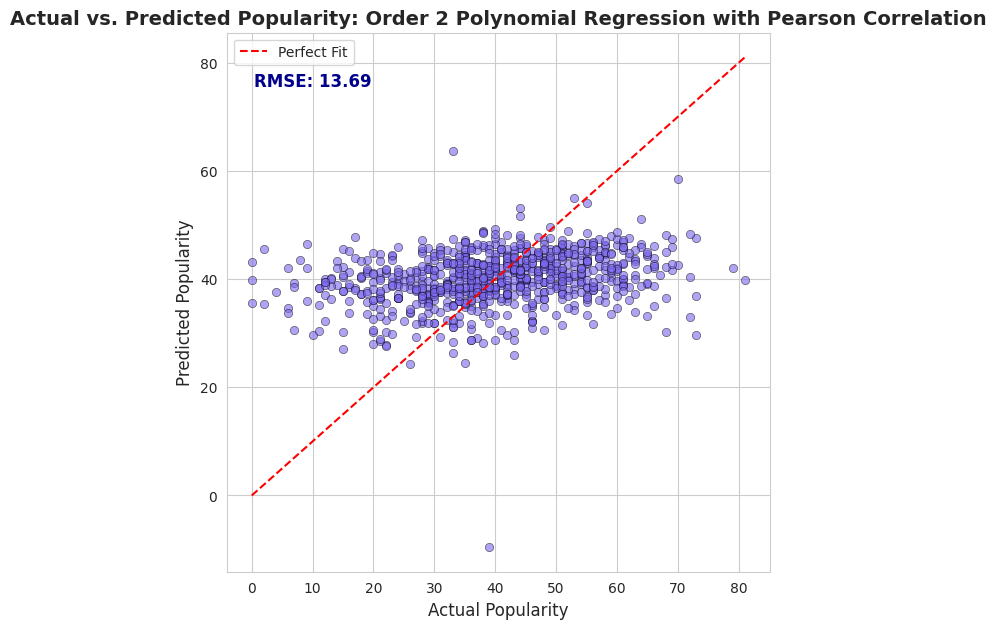

Evaluating with Spearman correlation
Top 10 Features for Spearman Popularity Correlation:
trust               0.198367
positive            0.196330
joy                 0.195471
entropy_energy      0.190647
instrumentalness    0.181967
norm_trust          0.180573
norm_joy            0.180430
anticipation        0.177281
norm_positive       0.176398
n_words             0.175806
dtype: float64


/home/irnehs/UCSD/wi25/ece143/ece143_project/EDA.py:145: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(y=top_10_features, x=correlation[:10], palette=pastel_colors)


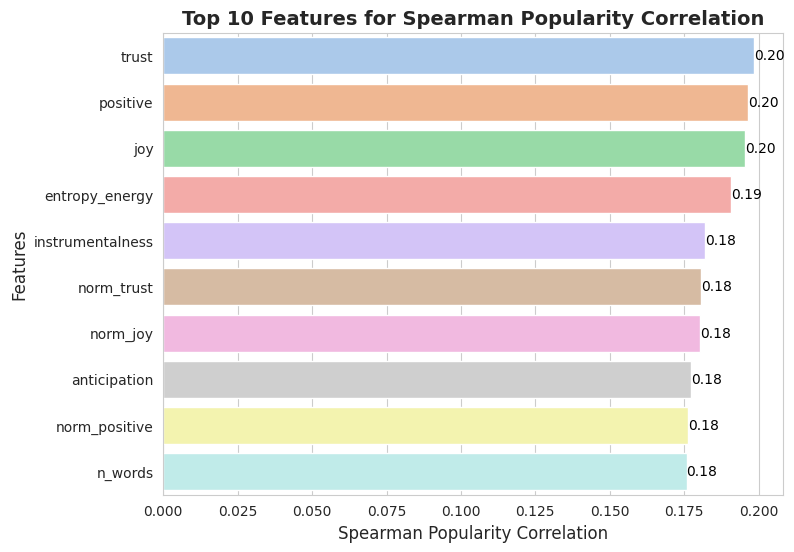

       RMSE:       R2:
0  13.700541  0.068148


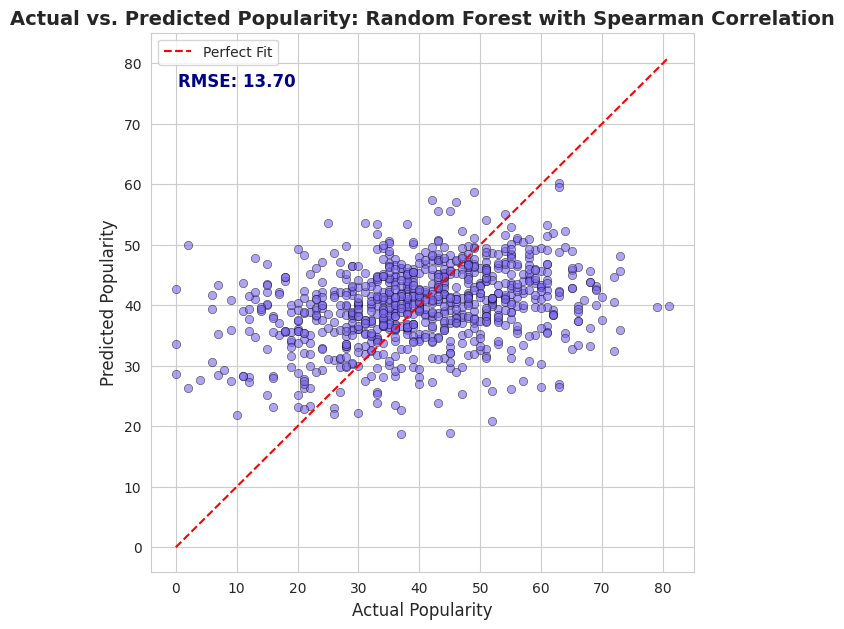

       RMSE:       R2:
0  13.652712  0.074643


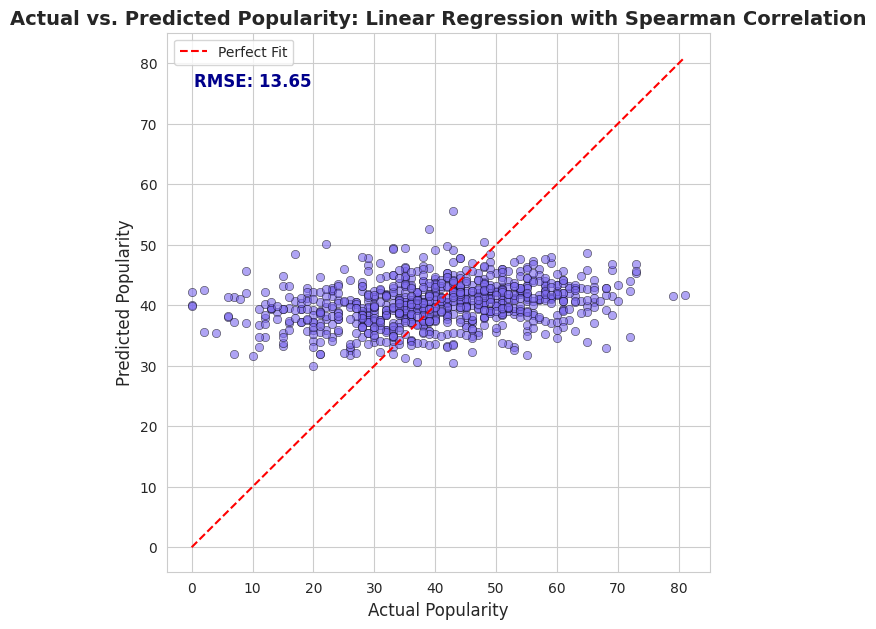

       RMSE:       R2:
0  13.753373  0.060948


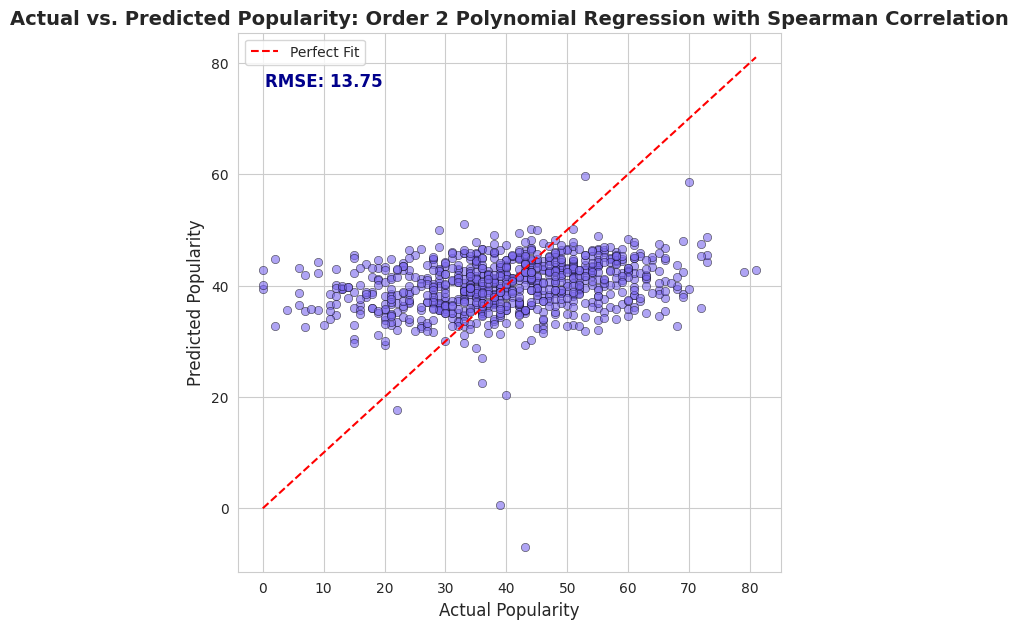

In [ ]:
evaluate_cluster(all_data, 'indie', 'Indie Songs')